# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
import pickle

training_file = "train.p"
validation_file= "valid.p"
testing_file = "test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np

#Number of training examples
n_train = len(X_train)

# Number of validation examples
n_validation = len(X_valid)

# Number of testing examples.
n_test = len(X_test)

# What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# How many unique classes/labels there are in the dataset.
n_classes = len(np.bincount(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

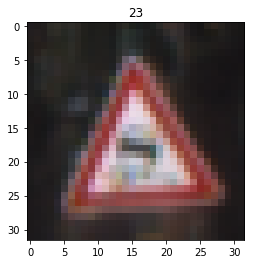

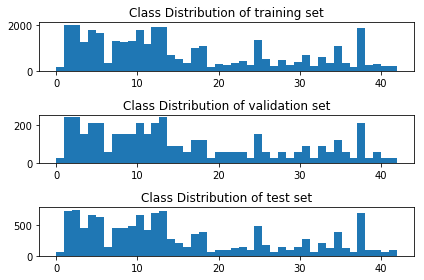

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

#Print random image and label_id
index = np.random.randint(0, len(X_train))
image = X_train[index]
plt.figure()
plt.title(y_train[index])
plt.imshow(image)

#histogram of class distribuion
fig = plt.figure()
plt.subplot(311)
plt.hist(y_train, bins=n_classes)  
plt.title("Class Distribution of training set")
plt.subplot(312)
plt.hist(y_valid, bins=n_classes)  
plt.title("Class Distribution of validation set")
plt.subplot(313)
plt.hist(y_test, bins=n_classes) 
plt.title("Class Distribution of test set")
plt.tight_layout()
plt.show()
fig.savefig("figures/histogram.png",bbox_inches='tight')

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

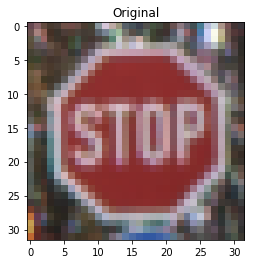

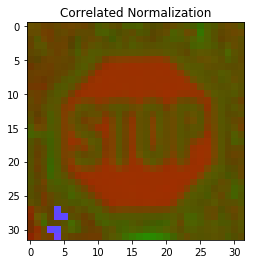

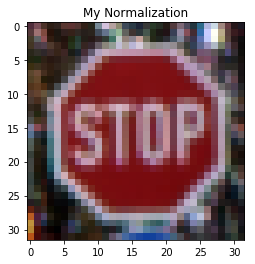

In [4]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

from sklearn.utils import shuffle

#Normalize image from -1 to 1
def normalize(img,mode):
    #no Normalization
    if mode == -1:
        return img
    #Normalize image the way the internet says
    elif mode == 0:
        norm = img.astype(np.float64)
        r = norm[:,:,0]
        g = norm[:,:,1]
        b = norm[:,:,2]

        rgb_sum = r + g + b + np.ones(r.shape) #add one to prevent divide by zero
        norm[:,:,0] = (2.0 * r / rgb_sum) - 1
        norm[:,:,1] = (2.0 * b / rgb_sum) - 1
        norm[:,:,2] = (2.0 * g / rgb_sum) - 1
        return norm
    #My way to normalize image by boosting contrast 
    elif mode == 1:
        bal = img.astype(np.float64)
        for i in range(0,3):
            #get min, max and range of image
            min_v = np.min(bal[:,:,i])
            max_v = np.max(bal[:,:,i])

            #scale image so that brightest pixel is 1 and darkest is -1
            range_v = float(max_v - min_v)
            bal[:,:,i] = bal[:,:,i] - min_v
            bal[:,:,i] =  2.0 * bal[:,:,i]/(range_v) -1
        return bal
    else:
        raise("Invalid normalization mode")
    

#show the result
index = np.random.randint(0, len(X_train))
orig = X_train[index]
norm0 = (normalize(orig,0) + 1)/2.0
norm1 = (normalize(orig,1) + 1)/2.0

fig = plt.figure()
plt.title("Original")
plt.imshow(orig)
fig.savefig("figures/orig.png")

fig = plt.figure()
plt.title("Correlated Normalization")
plt.imshow(norm0)
fig.savefig("figures/norm0.png")

fig = plt.figure()
plt.title("My Normalization")
plt.imshow(norm1)
fig.savefig("figures/norm1.png")

In [5]:
#Normalize entire dataset
print("Normalizing Images...")
X_train_norm = []
X_valid_norm = []
X_test_norm = []
for x_train in X_train:
    X_train_norm.append(normalize(x_train,1))
for x_valid in X_valid:
    X_valid_norm.append(normalize(x_valid,1))
for x_test in X_test:
    X_test_norm.append(normalize(x_test,1))

Normalizing Images...


### Model Architecture

In [6]:
### Define your architecture here.
### Feel free to use as many code cells as needed.


import tensorflow as tf
from tensorflow.contrib.layers import flatten

EPOCHS = 15
BATCH_SIZE = 128


def model(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Layer1: Convolutional 5x5 
    #parameters
    conv1_input_dim = image_shape[0]
    conv1_input_depth = image_shape[2]
    conv1_stride = 5
    conv1_pool = 2
    conv1_output_dim = int((conv1_input_dim - conv1_stride + 1)/conv1_pool)
    conv1_output_depth = 18
    conv1_shape = (conv1_stride, conv1_stride, conv1_input_depth, conv1_output_depth)
    #Conv2d
    conv1_W = tf.Variable(tf.truncated_normal(shape=conv1_shape, mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(conv1_output_depth))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    conv1 = tf.nn.relu(conv1)
    #Pooling
    conv1 = tf.nn.max_pool(conv1, ksize=[1, conv1_pool, conv1_pool, 1], strides=[1, conv1_pool, conv1_pool, 1], padding='VALID')
    #normalize
    conv1 = tf.nn.local_response_normalization(conv1)

    
    # Layer2: Convolutional 5x5
    #parameters
    conv2_input_dim = conv1_output_dim
    conv2_input_depth = conv1_output_depth
    conv2_stride = 5
    conv2_pool = 2
    conv2_output_dim = int((conv2_input_dim - conv2_stride + 1)/conv2_pool)
    conv2_output_depth = 48
    conv2_shape = (conv2_stride, conv2_stride, conv2_input_depth, conv2_output_depth)
    #Conv2d
    conv2_W = tf.Variable(tf.truncated_normal(shape=conv2_shape, mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(conv2_output_depth))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    conv2 = tf.nn.relu(conv2)
    #Pooling
    conv2 = tf.nn.max_pool(conv2, ksize=[1, conv2_pool, conv2_pool, 1], strides=[1, conv2_pool, conv2_pool, 1], padding='VALID')
    #normalize
    conv2 = tf.nn.local_response_normalization(conv2)


    #Flatten
    fc0   = flatten(conv2)
    
    # Layer 3: Fully Connected
    fc1_input_dim = conv2_output_dim**2 * conv2_output_depth
    fc1_output_dim = 200
    fc1_W = tf.Variable(tf.truncated_normal(shape=(fc1_input_dim, fc1_output_dim), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(fc1_output_dim))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    fc1    = tf.nn.relu(fc1)
    #dropout
    fc1 = tf.nn.dropout(fc1, 0.5)


    # Layer 4: Fully Connected
    fc2_input_dim = fc1_output_dim
    fc2_output_dim = 100
    fc2_W = tf.Variable(tf.truncated_normal(shape=(fc2_input_dim, fc2_output_dim), mean = mu, stddev = sigma))
    fc2_b = tf.Variable(tf.zeros(fc2_output_dim))
    fc2   = tf.matmul(fc1, fc2_W) + fc2_b
    fc2    = tf.nn.relu(fc2)
    #dropout
    fc2 = tf.nn.dropout(fc2, 0.5)

    # Layer 5: Fully Connected
    fc3_input_dim = fc2_output_dim
    fc3_output_dim = n_classes
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(fc3_input_dim, fc3_output_dim), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(fc3_output_dim))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits



x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)




### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [7]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.


rate = 0.001

logits = model(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

#Train and validate
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train_norm)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train_norm, y_train = shuffle(X_train_norm, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_norm[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_valid_norm, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './model')
    print("Model saved")
    
    

Training...

EPOCH 1 ...
Validation Accuracy = 0.668

EPOCH 2 ...
Validation Accuracy = 0.834

EPOCH 3 ...
Validation Accuracy = 0.885

EPOCH 4 ...
Validation Accuracy = 0.902

EPOCH 5 ...
Validation Accuracy = 0.917

EPOCH 6 ...
Validation Accuracy = 0.933

EPOCH 7 ...
Validation Accuracy = 0.942

EPOCH 8 ...
Validation Accuracy = 0.943

EPOCH 9 ...
Validation Accuracy = 0.941

EPOCH 10 ...
Validation Accuracy = 0.944

EPOCH 11 ...
Validation Accuracy = 0.946

EPOCH 12 ...
Validation Accuracy = 0.961

EPOCH 13 ...
Validation Accuracy = 0.955

EPOCH 14 ...
Validation Accuracy = 0.960

EPOCH 15 ...
Validation Accuracy = 0.960

Model saved


In [8]:
#Test
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test_norm, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.942


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load images

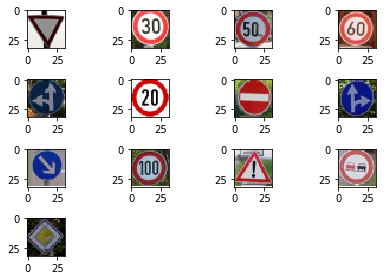

In [9]:
import imageio
import csv

#Import test images  
imgs = []
imgs_norm = []
img_labels = [13,1,2,3,37,0,17,36,38,7,18,9,12]

path = "images/"
for i in range(1,14):
    img_name = path + str(i) + ".jpg"
    img = imageio.imread(img_name)
    #normalize new images
    img_norm = normalize(img,1)
    #store them
    imgs.append(img)
    imgs_norm.append(img_norm)


#parse csv
classes = []
with open('signnames.csv', 'rt') as file:
    reader = csv.DictReader(file, delimiter=',')
    for r in reader:
        classes.append((r['SignName']))    

#Visualize images
plt.figure()
for i,img in enumerate(imgs):
    plt.subplot(4,4,i+1)
    plt.imshow(img) 
plt.tight_layout()
plt.show()

### Predict the Sign Type for Each Image

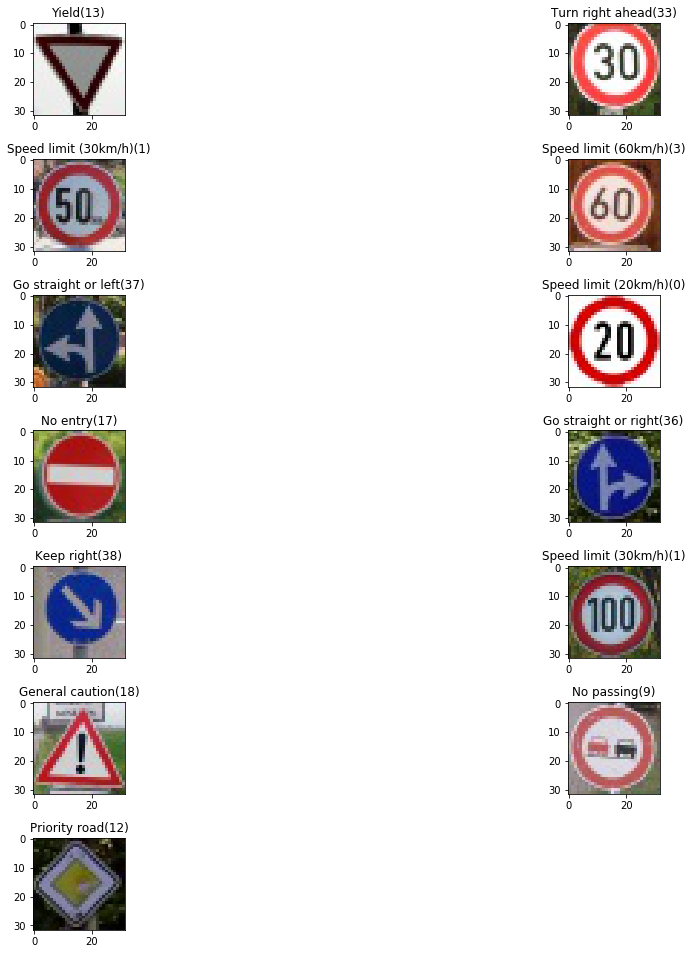

In [10]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

#Test on new images
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    #predict
    pred_vals = sess.run(tf.nn.softmax(logits),feed_dict={x:imgs_norm})
    #print prediction
    plt.figure(figsize=(15,15))    
    for i,(pred,img) in enumerate(zip(pred_vals,imgs)):
        plt.subplot(8,2,i+1)
        label_id = np.argmax(pred)
        plt.title(classes[label_id] + "(" + str(label_id) + ")")
        plt.imshow(img) 
    plt.tight_layout()
    plt.show()




### Analyze Performance

In [14]:
### Calculate the accuracy for these 5 new images. 

#Test accuracy on new images
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))        
    
    test_accuracy = evaluate(imgs_norm, img_labels)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.846


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

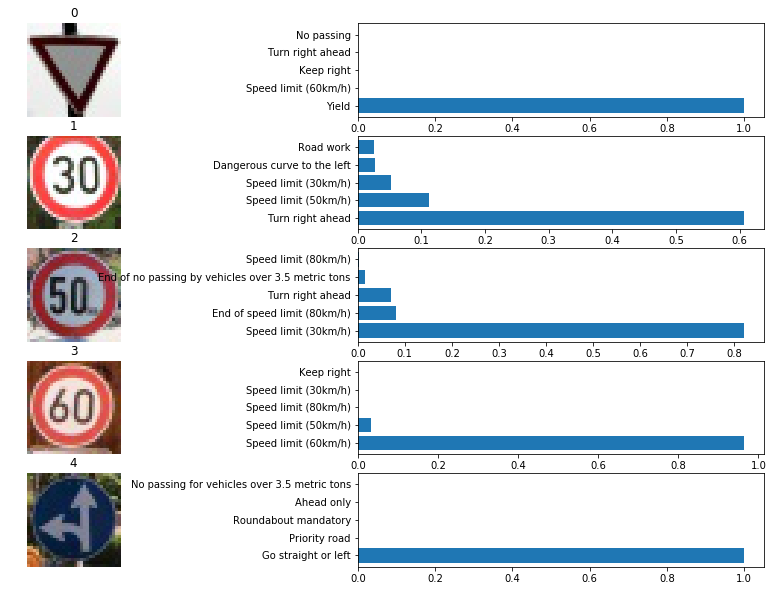

In [12]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

#Score the prediction
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.')) 
    top_k = sess.run(tf.nn.top_k(pred_vals, 5, sorted=True))
    fig = plt.figure(figsize=(16, 10))
    #referenced another students code for help in making this plot
    #I cant remember the exact source
    for i in range(5):
        plt.subplot(5, 2, 2*i+1)
        plt.imshow(imgs[i]) 
        plt.title(i)
        plt.axis('off')
        plt.subplot(5, 2, 2*i+2)
        plt.barh(np.arange(1, 6, 1), top_k.values[i, :])
        labs=[classes[j] for j in top_k.indices[i]]
        plt.yticks(np.arange(1, 6, 1), labs)
    plt.show()
    fig.savefig("figures/top5.png",bbox_inches='tight')